In [5]:
import ROOT as root
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random

In [6]:
triggerCode = '''
//auto fileName = "../rootfiles/output_geiger_30foils.root";
//auto treeName = "tree";

//TFile* f = new TFile((TString)fileName,"READ");
//TTree* t = (TTree*)f->Get(treeName);

bool getTrigger(double edep, double x, double y, double z) {
    if (edep > 0.05) {
        return true;
    } else {
    return false;
    }
}
'''

root.gInterpreter.Declare(triggerCode)

False

input_line_156:8:6: error: redefinition of 'getTrigger'
bool getTrigger(double edep, double x, double y, double z) {
     ^
input_line_53:8:6: note: previous definition is here
bool getTrigger(double edep, double x, double y, double z) {
     ^


34 entries passed trigger
43 entries passed trigger
41 entries passed trigger
68 entries passed trigger
71 entries passed trigger
70 entries passed trigger
86 entries passed trigger
78 entries passed trigger


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


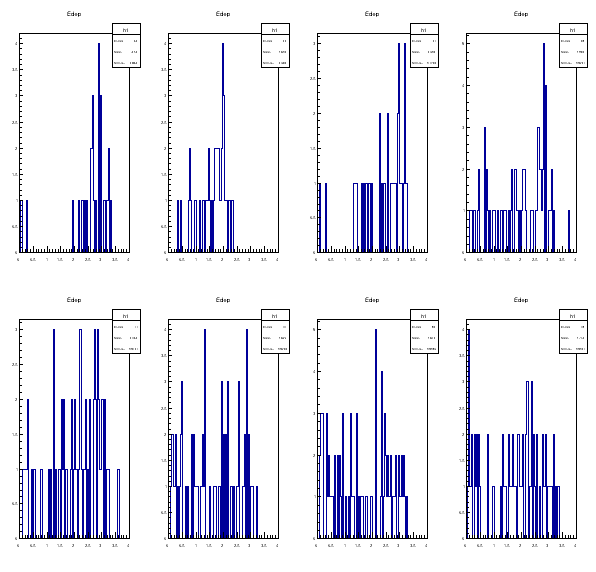

In [9]:
thickness = [1,4,8,12,15,22,30,52]

c1 = root.TCanvas("c1","c1",600,600)
c1.Divide(4,2,0.01,0.01,0)

hEdep = []
counts = []

for i in range(len(thickness)):

    fName = "../rootfiles/output_geiger_" + str(thickness[i]) + "foils.root"
    tName = "tree"

    f = root.TFile(fName)
    myTree = f.Get(tName)

    entries = myTree.GetEntriesFast()

    #myTree.Show(1)
    #myTree.Print()

    root.EnableImplicitMT()
    d = root.RDataFrame(tName,fName)

    fdf = d.Define("trigger", "getTrigger(energyDep, positionX, positionY, positionZ)")

    triggers = fdf.Filter("trigger==true").Count()
    print('{} entries passed trigger'.format(triggers.GetValue()))

    counts.append(triggers.GetValue())

    fdft = fdf.Filter("trigger==true")

    # Canvas 1
    hEdep.append(fdft.Histo1D(("h1", "Edep", 100, 0.0, 4.0),'energyDep'))
    #hXpos = fdft.Histo1D(("h2", "Xpos", 100, -10.0, 20.0),'positionX')
    #hYpos = fdft.Histo1D(("h3", "Ypos", 100, -10.0, 20.0),'positionY')
    #hZpos = fdft.Histo1D(("h4", "ZPos", 100, -10.0, 50.0),'positionZ')

    c1.cd(i+1)
    hEdep[i].Draw()
    #c1.cd(2)
    #hXpos.Draw()
    #c1.cd(3)
    #hYpos.Draw()
    #c1.cd(4)
    #hZpos.Draw()

    c1.Update()
    #c1.Print("basic_plots.pdf");

c1.Draw()

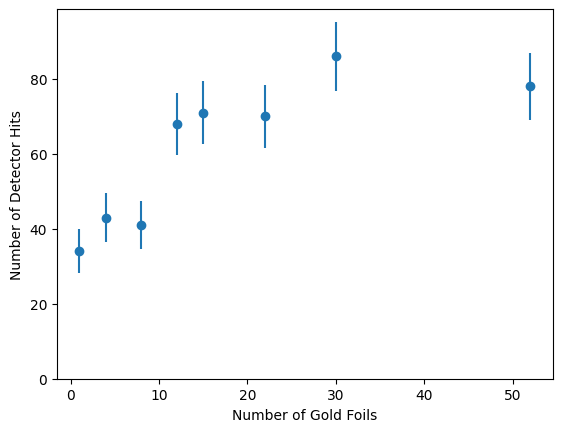

In [10]:
import numpy as np
import matplotlib.pyplot as plt

ecounts = np.sqrt(counts)

plt.errorbar(thickness,counts,ecounts,fmt='o')
plt.ylim(0)
plt.xlabel("Number of Gold Foils")
plt.ylabel("Number of Detector Hits")

plt.show()